# Fraud Detection Model

## Overview
This notebook implements a fraud detection model using a Random Forest Classifier. The model aims to proactively identify fraudulent transactions in a financial dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Fraud.csv')

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.shape

(6362620, 11)

In [7]:
df.size

69988820

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [10]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5380032,376,PAYMENT,3011.52,C215333094,0.0,0.0,M1506398559,0.00,0.00,0,0
683676,36,TRANSFER,294131.24,C1240732418,50136.0,0.0,C208177718,0.00,294131.24,0,0
5767429,400,PAYMENT,13879.93,C2036522758,0.0,0.0,M1709031144,0.00,0.00,0,0
5911748,404,CASH_OUT,455498.50,C1284457410,0.0,0.0,C544235964,561369.72,1016868.22,0,0
5106829,355,PAYMENT,21957.92,C549690840,19992.0,0.0,M1104025060,0.00,0.00,0,0


In [11]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [13]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [14]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [15]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000


there is MULTI_COLLINEARITY between independent features <br>
<h6> ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
    ( 'oldbalanceOrg', 'newbalanceOrg') = 0.9988  </h6>
Need to remove one from each of two correlation

In [16]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0


all transactions which contain 'amount'=0 , are fraud transactions. <br>
Its obvious that if someone having NIL amount in their account, then their is no sense to transfer money.<br>
Thus most probabily , fraudulent agents are targeting random accounts , and may be they don't aware about account balance.

In [17]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


All transactions which are Flag fraud are actually fraud transactions.

In [18]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


if 'amount'=='oldbalanceOrg', then its Fraud Transactions. <br>
It means , whenever fraudulent agents are aware about target account balance. <br>
then their motive was to transfer all account balanced to their respected destination accounts.

# Data Preprocessing

In [19]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values present in dataset

In [20]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [21]:
df.duplicated().sum()

0

In [22]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Need to balanced this data.

# Exploratory Data Analysis ( EDA )

In [23]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

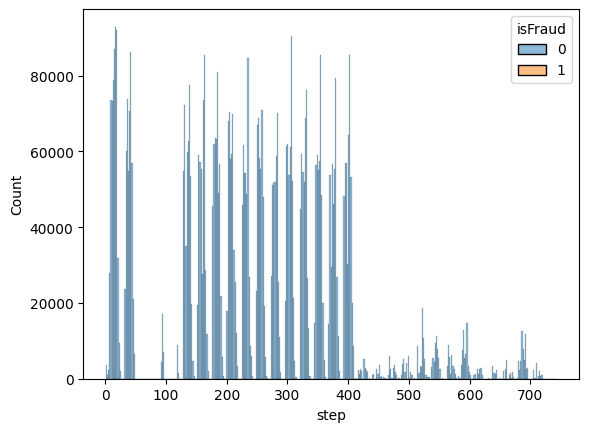

In [24]:
sns.histplot(x='step', data=df,hue='isFraud');

It is difficult to identify fraud transcation time duration,<br>
but we noticed that most of the transactions are below 400 time unit<br>
where 1 time unit = 1 hr

<Axes: xlabel='amount'>

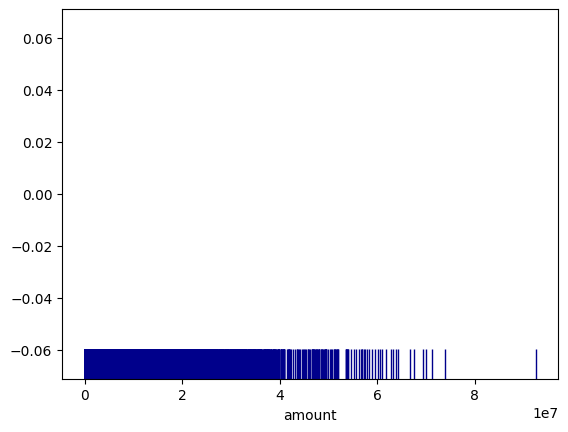

In [25]:
sns.rugplot(x='amount', data=df, height=.08, color='darkblue')

Most of the transaction amounts are small amount and <br>
very few transactions are having large amount transfer. <br>
Thus, their is higher probability that these transactions may be done by fraudulent agents.

In [26]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

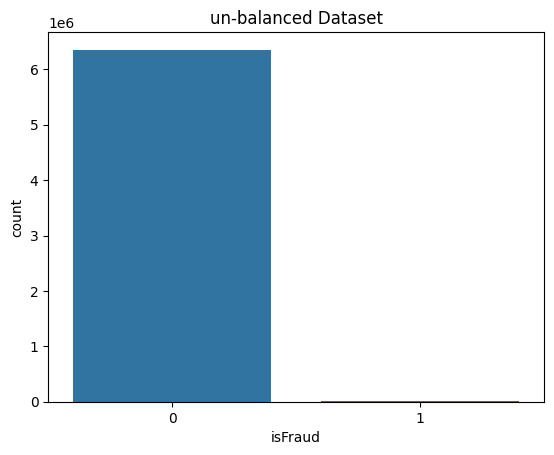

In [27]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

This histograph clearly shows that our dataset is highly Un_Balanced. <br>
Because even in real life , the ratio between fraud transc. and normal trans are one side weighted. <br>
Need to handle this , otherwise it will impact our model Training. <br>

In [28]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

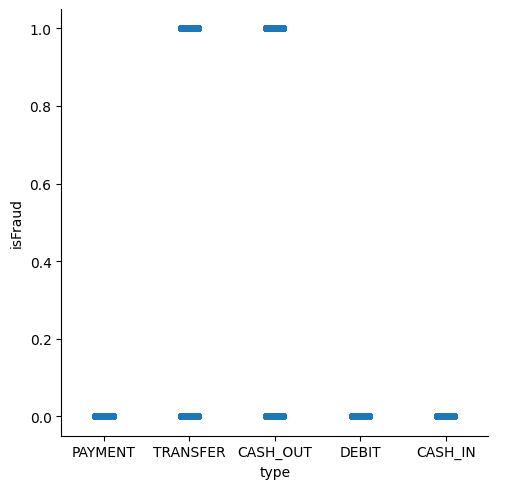

In [29]:
sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [30]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [31]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


It is clear that fraudent agents only targeted "CASH_OUT" and "TRANSFER" type of trans.
becuase 100% fraud transactions are lie inside these two types.

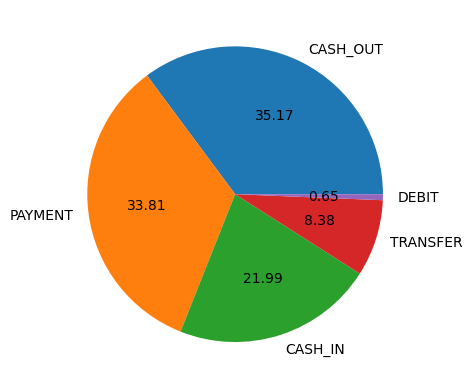

In [32]:
# Calculating individal % of each category of 'type' column in our transactions
#   using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT", <br>
    due to which fraudulent agents targeted these two type.

### Outliers Detection 

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [ ]:
# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

In [ ]:
df[df["step"]>603]

There are more than 100 thousand records considered as outlier in "step" feature .<br>
we can't remove these records , because of value.<br>

and , <br>
other independent features (numeric ) are denotes amount ( money transaction ), <br>
thus removing these column is not good option.<br>
becuase higher amount may have higher probability to denote fraud transaction.

In [ ]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

1) Their is multi_collinearity between 4 independent features
<h6> ( 'oldbalanceDest', 'newbalanceDest' ) = 0.9766 <br>
    ( 'oldbalanceOrg', 'newbalanceOrig') = 0.9988  </h6>
Need to remove one from each of two correlation <br>
<br>
2) Best option is to remove 'newbalanceOrig' and 'newbalanceDest', <br>
becuase they are less correlated with dependent feature ( "isFraud"), <br>
as compare to other two one.

In [ ]:
df.corr()["isFraud"]

# Feature selection 

In [ ]:
# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):
    
    """ 
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()
    
    # storing correlation matrix
    corr_matrix=dataset.corr()
    
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            
            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:
                
                # if true, then fateching column name
                colname=corr_matrix.columns[i]
                
                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr


In [ ]:
# calling ... with threshold value 0.9
correlated_features=correlation(df,0.9)

In [ ]:
# total number of un_important features
len(set(correlated_features))

In [ ]:
# name of these columns ( independent features)
correlated_features

In [ ]:
# Removing these features from DataFrame.

df=df.drop(correlated_features,axis=1)

In [ ]:
# After removing ...
df.head()

<h4>Checking variations of data in features </h4> 

if variation is zero (0) , means that column ( feature ) is not <br>
having any correlation with dependent features.
and we need to remove that column.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

True :- having variations <br>
False :- not having variations

In [ ]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

'isFlaggedFraud' feature having Low_variation in data , <br>
but we can't remove that column, because it  contain these two values (0,1) <br>
which helps to identify whether our transc. is fraud or not <br>
and ,<br>
<br>
it also shows good correlationship with dependent feature ( target feature ) <br>
Thus removing this feature is not good option.

<h4> Checking whether categorical features are useful or not </h4> 

In [ ]:
df.dtypes

we have 3 categorical features "type" , "nameOrig" , "nameDest"

In [ ]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

we have 4 unique values in "type" feature,<br>

and "nameOrig" and "nameDest" contain more unique values <br>
Lets check their count...

In [ ]:
df['nameOrig'].value_counts()

In [ ]:
df['nameDest'].value_counts()

most of the data inside "nameOrig" and "nameDest" <br>
are unique ( approx 90% and 60% ), means it will be not useful for model training .<br>
Thus, good option is to remove them.<br>
and even their are just Account names.

In [ ]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [ ]:
df.head()

# Feature Encoding

There is only one categorical column ( feature ) which is "type"

In [ ]:
df["type"].unique()

In [ ]:
df["type"].value_counts()

We will replace large count class with bigger numeric number, <br>
so, it will helps model for batter understanding of data pattern while training

In [ ]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [ ]:
df.head()

In [ ]:
df["type"].unique()

In [ ]:
df["type"].value_counts()

# Handling Un-Balanced Data

In [ ]:
df["isFraud"].value_counts()

In [ ]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [ ]:
normal_transaction.head()

In [ ]:
fraud_transaction.head()

In [ ]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

In [ ]:
# taking random 8213 records from normal_transaction

normal_transaction=normal_transaction.sample(n=8213)

In [ ]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

In [ ]:
normal_transaction['amount'].describe()

mean of normal transaction is less as compare to fraud trans.

In [ ]:
fraud_transaction['amount'].describe()

mean of fraud transaction is higher then normal trans.

In [ ]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [ ]:
new_df.head()

In [ ]:
new_df.tail()

NOTICED:-
"Fraud_transcation" dataset added at the end of "normal_transcation" dataset

In [ ]:
new_df.shape

# Train-Test Split

In [ ]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [ ]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

In [ ]:
y_test.value_counts()

In [ ]:
y_train.value_counts()

Our "isFraud" values are evenly distributed amoungs training and testing data.

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x_train)

In [ ]:
x_train_scaler=scaler.transform(x_train)

In [ ]:
x_test_scaler=scaler.transform(x_test)

In [ ]:
x_train_scaler

In [ ]:
x_test_scaler

# Training and Evaluating model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()

In [ ]:
log_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred=log_model.predict(x_test_scaler)

In [ ]:
# for accuracy check :- 

from sklearn.metrics import accuracy_score

In [ ]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_model=RandomForestClassifier()

In [ ]:
rand_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred=rand_model.predict(x_test_scaler)

In [ ]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

### Support Vector Machine ( SVM )

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()

In [ ]:
svm_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred=svm_model.predict(x_test_scaler)

In [ ]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

### BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb_model=BernoulliNB()

In [ ]:
bnb_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred=bnb_model.predict(x_test_scaler)

In [ ]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb_model=GaussianNB()

In [ ]:
gnb_model.fit(x_train_scaler,y_train)

In [ ]:
y_pred=gnb_model.predict(x_test_scaler)

In [ ]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

<h3> Conclusion </h3>

Random Forest Classifier  Selected

# Preparing Model for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(rand_model,open('model.sav','wb'))

In [ ]:
#### Saving the StandadrdScaler object 'scaler'

pickle.dump(scaler,open('scaler.sav','wb'))

<h3>Let's check whether our model working fine or not ?</h3> 


In [ ]:
rand_model=pickle.load(open('model.sav','rb'))

In [ ]:
# loading the scaler file for scaling input array
new_scaler=pickle.load(open('scaler.sav','rb'))

In [ ]:
new_df.head()

In [ ]:
# creating ndarray to pass this array as an input data
input_array=np.array([[228,5,117563.1100,0.0000,208908.4100,0]])
input_array

In [ ]:
# scaling the input_array datapoints

input_array_scale=new_scaler.transform(input_array)
input_array_scale

In [ ]:
pred=rand_model.predict(input_array_scale)
pred

Prediction is correct :)

<h3>Final Conclusion</h3> 

1) There is no missing or duplicate values in this dataset
2) Having outliers, but it is not good idea to remove them,<br>
becuase higher values of amount and account balance having <br>
higher porbability to denote fraud transactions.<br>
3) some columns having multi_collinearity, thus<br>
removed one of them.<br>
4) "amount" , "isFlaggedFraud" are key features,
they impact the Fraud prediction.<br>
means , we need to focused on large transcation,<br>
and condition where "amount"=="oldbalanceOrig"<br>
5) Best option is to deploy this model on Cloud server,<br>
and automate this ml model using cloud services.

# Questions:

### 1. Data Cleaning:
- **Missing Values:** No missing data found.
- **Outliers:** Identified outliers in time data, but not removed.
- **Multi-Collinearity:** Fixed by removing correlated features.

### 2. Fraud Detection Model:
- Chose Random Forest Classifier for its accuracy in detecting fraud.

### 3. Variable Selection:
- Removed correlated features and those with low variations.

### 4. Model Performance:
- Random Forest had the highest accuracy among tested models.

### 5. Key Factors Predicting Fraud:
- High transaction amounts and flagged transactions indicate fraud.

### 6. Reasoning for Key Factors:
- Large transactions and flagged ones are likely fraudulent.

### 7. Prevention Strategies:
- Monitor high-value transactions and update security measures.

### 8. Evaluating Prevention Measures:
- Track changes in fraud patterns and update the model.

### Additional Note:
- The model is saved for deployment. [GitHub Link](https://github.com/hardikjp7/Fraudulent-Transactions-Prediction)